In [27]:
# Configuración: librerías y opciones
import warnings
warnings.filterwarnings('ignore')

# Dependencias principales (validación de instalación)
try:
	import pandas as pd
	import numpy as np
	import seaborn as sns
	import matplotlib.pyplot as plt
	import scipy.stats as st
	import plotly.express as px
	import plotly.graph_objects as go
except ModuleNotFoundError as e:
	missing = str(e).split("'")[1]
	print(f"Falta instalar la librería: {missing}. Ejecuta en terminal: \n\n    python3 -m venv .venv && source .venv/bin/activate && pip install -r requirements.txt\n")

# Opciones de pandas y estilo
display_options = {
	'display.max_columns': 120,
	'display.width': 140,
	'display.max_colwidth': 200,
}
for k, v in display_options.items():
	pd.set_option(k, v)

sns.set(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (10, 6)



In [28]:
# (opcional) Comprobación mínima
print('Versión de pandas:', pd.__version__)


Versión de pandas: 2.3.1


In [29]:
# Carga de datos (lectura directa con pandas)

df = pd.read_csv('../NHANES2009-2012.csv')
print('Forma (filas, columnas):', df.shape)
df.head(5)


Forma (filas, columnas): (10000, 75)


,SurveyYr,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
0,2009_10,55829,female,28,20-29,343.0,White,NaN,CollegeGrad,Married,more 99999,100000.0,5.00,5.0,Own,Working,61.0,NaN,NaN,161.8,23.30,NaN,18.5_to_24.9,82.0,121.0,79.0,124.0,78.0,124.0,74.0,118.0,84.0,NaN,2.79,4.14,215.0,3.909,NaN,NaN,No,NaN,Vgood,0.0,3.0,NaN,NaN,NaN,NaN,NaN,7.0,No,Yes,2.0,NaN,NaN,NaN,NaN,Yes,3.0,72.0,NaN,No,Non-Smoker,NaN,Yes,15.0,No,NaN,Yes,Yes,13.0,20.0,1.0,No,Heterosexual
1,2009_10,57112,male,14,10-19,170.0,White,NaN,NaN,NaN,75000-99999,87500.0,4.17,4.0,Own,NaN,88.9,NaN,NaN,162.3,33.75,NaN,30.0_plus,70.0,102.0,62.0,102.0,62.0,NaN,NaN,NaN,NaN,NaN,1.09,2.79,98.0,NaN,NaN,NaN,No,NaN,Excellent,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009_10,60232,male,80,NaN,NaN,White,NaN,8thGrade,Married,20000-24999,22500.0,1.58,6.0,Own,NotWorking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,141.0,57.0,142.0,62.0,138.0,58.0,144.0,56.0,NaN,1.40,4.22,121.0,0.590,NaN,NaN,No,NaN,Poor,30.0,0.0,NaN,NaN,NaN,NaN,NaN,9.0,No,No,NaN,NaN,NaN,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009_10,59919,male,22,20-29,268.0,White,NaN,HighSchool,NeverMarried,45000-54999,50000.0,1.85,7.0,Rent,Working,65.8,NaN,NaN,170.1,22.74,NaN,18.5_to_24.9,62.0,105.0,59.0,104.0,62.0,104.0,64.0,106.0,54.0,NaN,1.84,4.97,72.0,1.091,NaN,NaN,No,NaN,Good,0.0,5.0,NaN,NaN,NaN,NaN,NaN,7.0,No,Yes,3.0,NaN,NaN,NaN,NaN,Yes,4.0,156.0,No,Yes,Smoker,9.0,Yes,10.0,Yes,10.0,Yes,Yes,18.0,3.0,1.0,No,Heterosexual
4,2009_10,56351,male,1,0-9,16.0,White,NaN,NaN,NaN,25000-34999,30000.0,1.45,7.0,Own,NaN,9.8,78.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Normalización básica de valores faltantes y tipos

na_like = {"NA", "NaN", "nan", "", ".", "null", "None", "N/A", "n/a"}

def coerce_na(value):
	if pd.isna(value):
		return np.nan
	if isinstance(value, str) and value.strip() in na_like:
		return np.nan
	return value

# Aplicar normalización
for c in df.columns:
	df[c] = df[c].apply(coerce_na)

# Inferir tipos: intentar float y, si no, dejar como object
for c in df.columns:
	try:
		df[c] = pd.to_numeric(df[c])
	except Exception:
		pass

rows, cols = df.shape
print(f"Filas: {rows} | Columnas: {cols}")
df.sample(5, random_state=7)


Filas: 10000 | Columnas: 75


,SurveyYr,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,HomeOwn,Work,Weight,Length,HeadCirc,Height,BMI,BMICatUnder20yrs,BMI_WHO,Pulse,BPSysAve,BPDiaAve,BPSys1,BPDia1,BPSys2,BPDia2,BPSys3,BPDia3,Testosterone,DirectChol,TotChol,UrineVol1,UrineFlow1,UrineVol2,UrineFlow2,Diabetes,DiabetesAge,HealthGen,DaysPhysHlthBad,DaysMentHlthBad,LittleInterest,Depressed,nPregnancies,nBabies,Age1stBaby,SleepHrsNight,SleepTrouble,PhysActive,PhysActiveDays,TVHrsDay,CompHrsDay,TVHrsDayChild,CompHrsDayChild,Alcohol12PlusYr,AlcoholDay,AlcoholYear,SmokeNow,Smoke100,Smoke100n,SmokeAge,Marijuana,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation
1977,2009_10,57644,male,0,0-9,10.0,White,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Rent,NaN,8.6,73.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3880,2009_10,59593,female,31,30-39,380.0,Black,NaN,9_11thGrade,NeverMarried,15000-19999,17500.0,0.55,4.0,Rent,Working,61.3,NaN,NaN,156.1,25.16,NaN,25.0_to_29.9,52.0,145.0,101.0,144.0,100.0,144.0,104.0,146.0,98.0,NaN,1.14,4.45,107.0,0.605,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Non-Smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,2009_10,61220,female,34,30-39,415.0,White,NaN,SomeCollege,Married,75000-99999,87500.0,4.08,6.0,Own,Working,91.8,NaN,NaN,166.1,33.27,NaN,30.0_plus,86.0,99.0,68.0,98.0,72.0,100.0,70.0,98.0,66.0,NaN,1.11,4.71,42.0,0.667,NaN,NaN,No,NaN,Vgood,0.0,7.0,NaN,NaN,2.0,2.0,26.0,7.0,No,No,NaN,NaN,NaN,NaN,NaN,Yes,2.0,12.0,No,Yes,Smoker,18.0,No,NaN,No,NaN,No,Yes,15.0,2.0,1.0,No,Heterosexual
2551,2009_10,59600,male,52,50-59,625.0,White,NaN,CollegeGrad,Married,55000-64999,60000.0,3.28,7.0,Own,Working,103.5,NaN,NaN,186.2,29.85,NaN,25.0_to_29.9,70.0,107.0,68.0,108.0,72.0,108.0,64.0,106.0,72.0,NaN,0.91,5.12,146.0,1.431,NaN,NaN,No,NaN,Excellent,0.0,0.0,NaN,NaN,NaN,NaN,NaN,7.0,No,Yes,3.0,NaN,NaN,NaN,NaN,Yes,NaN,0.0,NaN,No,Non-Smoker,NaN,Yes,20.0,No,NaN,No,Yes,18.0,5.0,1.0,No,Heterosexual
2246,2009_10,55933,female,37,30-39,445.0,White,NaN,CollegeGrad,Married,65000-74999,70000.0,4.80,4.0,Own,NotWorking,81.3,NaN,NaN,168.8,28.53,NaN,25.0_to_29.9,76.0,99.0,66.0,102.0,66.0,102.0,62.0,96.0,70.0,NaN,1.11,3.31,108.0,1.333,NaN,NaN,No,NaN,Vgood,0.0,5.0,NaN,NaN,NaN,NaN,NaN,8.0,No,Yes,3.0,NaN,NaN,NaN,NaN,No,2.0,7.0,NaN,No,Non-Smoker,NaN,No,NaN,No,NaN,No,Yes,23.0,2.0,1.0,No,Heterosexual


In [47]:
rows, cols = df.shape
missing_pct = df.isna().mean().sort_values(ascending=False)
print(f"Filas: {rows}\nColumnas: {cols}")
missing_pct


Filas: 10000
Columnas: 75


HeadCirc           0.9912
Length             0.9457
DiabetesAge        0.9371
TVHrsDayChild      0.9347
CompHrsDayChild    0.9347
                    ...  
Age                0.0000
SurveyYr           0.0000
Race1              0.0000
ID                 0.0000
Gender             0.0000
Length: 75, dtype: float64

In [32]:
# Diccionario de datos preliminar

column_descriptions = {
	"SurveyYr": "Ciclo de encuesta NHANES (p. ej., 2009_10, 2011_12)",
	"ID": "Identificador del participante",
	"Gender": "Sexo biológico reportado",
	"Age": "Edad (años)",
	"AgeDecade": "Edad por decenios (categorías)",
	"AgeMonths": "Edad en meses (aplica en menores)",
	"Race1": "Raza/Etnicidad principal (p. ej., White, Black, Mexican)",
	"Race3": "Raza/Etnicidad detallada (si aplica)",
	"Education": "Nivel educativo",
	"MaritalStatus": "Estado civil",
	"HHIncome": "Rango de ingresos del hogar",
	"HHIncomeMid": "Punto medio del rango de ingresos",
	"Poverty": "Índice/razón de pobreza",
	"HomeRooms": "Número de habitaciones en el hogar",
	"HomeOwn": "Tenencia de vivienda (Own/Rent)",
	"Work": "Situación laboral",
	"Weight": "Peso (kg) si aplica",
	"Length": "Longitud (niños pequeños)",
	"HeadCirc": "Perímetro cefálico (niños)",
	"Height": "Altura (cm)",
	"BMI": "Índice de Masa Corporal",
	"BMICatUnder20yrs": "Categoría IMC <20 años",
	"BMI_WHO": "Categoría IMC según OMS",
	"Pulse": "Frecuencia cardiaca (lpm)",
	"BPSysAve": "PA sistólica promedio",
	"BPDiaAve": "PA diastólica promedio",
	"BPSys1": "PA sistólica toma 1",
	"BPDia1": "PA diastólica toma 1",
	"BPSys2": "PA sistólica toma 2",
	"BPDia2": "PA diastólica toma 2",
	"BPSys3": "PA sistólica toma 3",
	"BPDia3": "PA diastólica toma 3",
	"Testosterone": "Testosterona (unidad según codebook)",
	"DirectChol": "Colesterol directo",
	"TotChol": "Colesterol total",
	"UrineVol1": "Volumen de orina 1",
	"UrineFlow1": "Flujo de orina 1",
	"UrineVol2": "Volumen de orina 2",
	"UrineFlow2": "Flujo de orina 2",
	"Diabetes": "Diagnóstico de diabetes (auto-reportado)",
	"DiabetesAge": "Edad de diagnóstico de diabetes",
	"HealthGen": "Salud general percibida",
	"DaysPhysHlthBad": "Días con mala salud física (últimos 30)",
	"DaysMentHlthBad": "Días con mala salud mental (últimos 30)",
	"LittleInterest": "Anhedonia (PHQ-2)",
	"Depressed": "Ánimo deprimido (PHQ-2)",
	"nPregnancies": "Número de embarazos",
	"nBabies": "Número de partos",
	"Age1stBaby": "Edad al primer parto",
	"SleepHrsNight": "Horas de sueño por noche",
	"SleepTrouble": "Problemas de sueño",
	"PhysActive": "Actividad física regular",
	"PhysActiveDays": "Días de actividad física",
	"TVHrsDay": "Horas de TV al día",
	"CompHrsDay": "Horas de computador al día",
	"TVHrsDayChild": "Horas de TV (niños)",
	"CompHrsDayChild": "Horas de computador (niños)",
	"Alcohol12PlusYr": "Consumió alcohol en el último año",
	"AlcoholDay": "Consumo de alcohol por día",
	"AlcoholYear": "Frecuencia de consumo de alcohol en el año",
	"SmokeNow": "Fuma actualmente",
	"Smoke100": "Ha fumado 100 cigarrillos en su vida",
	"Smoke100n": "Número de cigarrillos (si aplica)",
	"SmokeAge": "Edad de inicio de tabaquismo",
	"Marijuana": "Uso de marihuana",
	"AgeFirstMarij": "Edad primer uso de marihuana",
	"RegularMarij": "Uso regular de marihuana",
	"AgeRegMarij": "Edad inicio uso regular",
	"HardDrugs": "Uso drogas duras",
	"SexEver": "Ha tenido relaciones sexuales",
	"SexAge": "Edad primera relación sexual",
	"SexNumPartnLife": "Número de parejas sexuales de por vida",
	"SexNumPartYear": "Número de parejas sexuales en el último año",
	"SameSex": "Parejas del mismo sexo",
	"SexOrientation": "Orientación sexual",
}

# Construir inventario con tipo inferido y % faltantes
inventory = []
for c in df.columns:
	dtype = str(df[c].dtype)
	missing = float(df[c].isna().mean())
	desc = column_descriptions.get(c, "Ver documentación NHANES para definición exacta del campo y unidad de medida.")
	inventory.append({"variable": c, "tipo": dtype, "%faltantes": round(missing*100, 2), "descripcion": desc})

inv_df = pd.DataFrame(inventory)
inv_df


,variable,tipo,%faltantes,descripcion
0,SurveyYr,object,0.00,"Ciclo de encuesta NHANES (p. ej., 2009_10, 2011_12)"
1,ID,int64,0.00,Identificador del participante
2,Gender,object,0.00,Sexo biológico reportado
3,Age,int64,0.00,Edad (años)
4,AgeDecade,object,3.33,Edad por decenios (categorías)
...,...,...,...,...
70,SexAge,float64,44.60,Edad primera relación sexual
71,SexNumPartnLife,float64,42.75,Número de parejas sexuales de por vida
72,SexNumPartYear,float64,50.72,Número de parejas sexuales en el último año
73,SameSex,object,42.32,Parejas del mismo sexo


In [33]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print('Numéricas:', len(numeric_cols))
print(', '.join(numeric_cols[:30]))
print('\nCategóricas:', len(cat_cols))
print(', '.join(cat_cols[:30]))


Numéricas: 45
ID, Age, AgeMonths, HHIncomeMid, Poverty, HomeRooms, Weight, Length, HeadCirc, Height, BMI, Pulse, BPSysAve, BPDiaAve, BPSys1, BPDia1, BPSys2, BPDia2, BPSys3, BPDia3, Testosterone, DirectChol, TotChol, UrineVol1, UrineFlow1, UrineVol2, UrineFlow2, DiabetesAge, DaysPhysHlthBad, DaysMentHlthBad

Categóricas: 30
SurveyYr, Gender, AgeDecade, Race1, Race3, Education, MaritalStatus, HHIncome, HomeOwn, Work, BMICatUnder20yrs, BMI_WHO, Diabetes, HealthGen, LittleInterest, Depressed, SleepTrouble, PhysActive, TVHrsDay, CompHrsDay, Alcohol12PlusYr, SmokeNow, Smoke100, Smoke100n, Marijuana, RegularMarij, HardDrugs, SexEver, SameSex, SexOrientation


In [34]:
# Resumen numérico
summary_num = df[numeric_cols].describe().T
summary_num['missing_pct'] = df[numeric_cols].isna().mean().values * 100
summary_num['iqr'] = summary_num['75%'] - summary_num['25%']
summary_num.head(20)


,count,mean,std,min,25%,50%,75%,max,missing_pct,iqr
ID,10000.0,61944.643800,5871.167160,51624.00,56904.500,62159.50,67039.000,71915.00,0.00,10134.50
Age,10000.0,36.742100,22.397566,0.00,17.000,36.00,54.000,80.00,0.00,37.00
AgeMonths,4962.0,420.123942,259.043091,0.00,199.000,418.00,624.000,959.00,50.38,425.00
HHIncomeMid,9189.0,57206.170421,33020.276584,2500.00,30000.000,50000.00,87500.000,100000.00,8.11,57500.00
Poverty,9274.0,2.801844,1.677909,0.00,1.240,2.70,4.710,5.00,7.26,3.47
HomeRooms,9931.0,6.248918,2.277538,1.00,5.000,6.00,8.000,13.00,0.69,3.00
Weight,9922.0,70.981798,29.125357,2.80,56.100,72.70,88.900,230.70,0.78,32.80
Length,543.0,85.016022,13.705026,47.10,75.700,87.00,96.100,112.20,94.57,20.40
HeadCirc,88.0,41.180682,2.311483,34.20,39.575,41.45,42.925,45.40,99.12,3.35
Height,9647.0,161.877838,20.186567,83.60,156.800,166.00,174.500,200.40,3.53,17.70


In [35]:
# Resumen categórico (top-5 valores y cardinalidad)

cat_summary = []
for c in cat_cols:
	vc = df[c].value_counts(dropna=False).head(5)
	cat_summary.append({
		'variable': c,
		'cardinalidad': df[c].nunique(dropna=True),
		'top': "; ".join([f"{str(k)} ({int(v)})" for k, v in vc.items()])
	})
cat_summary_df = pd.DataFrame(cat_summary)
cat_summary_df.head(20)


,variable,cardinalidad,top
0,SurveyYr,2,2009_10 (5000); 2011_12 (5000)
1,Gender,2,female (5020); male (4980)
2,AgeDecade,8,40-49 (1398); 0-9 (1391); 10-19 (1374); 20-29 (1356); 30-39 (1338)
3,Race1,5,White (6372); Black (1197); Mexican (1015); Other (806); Hispanic (610)
4,Race3,6,nan (5000); White (3135); Black (589); Mexican (480); Hispanic (350)
5,Education,5,nan (2779); SomeCollege (2267); CollegeGrad (2098); HighSchool (1517); 9_11thGrade (888)
6,MaritalStatus,6,Married (3945); nan (2769); NeverMarried (1380); Divorced (707); LivePartner (560)
7,HHIncome,12,more 99999 (2220); 75000-99999 (1084); 25000-34999 (958); 35000-44999 (863); nan (811)
8,HomeOwn,3,Own (6425); Rent (3287); Other (225); nan (63)
9,Work,3,Working (4613); NotWorking (2847); nan (2229); Looking (311)


In [36]:
key_vars = [v for v in ["BMI", "Height", "Pulse", "BPSysAve", "BPDiaAve", "TotChol"] if v in df.columns]

metrics = []
for c in key_vars:
	s = df[c].dropna()
	if len(s) == 0:
		continue
	metrics.append({
		'variable': c,
		'n': int(s.shape[0]),
		'mean': float(s.mean()),
		'median': float(s.median()),
		'std': float(s.std()),
		'min': float(s.min()),
		'max': float(s.max()),
		'IQR': float(s.quantile(0.75) - s.quantile(0.25)),
		'range': float(s.max() - s.min()),
	})

pd.DataFrame(metrics)


,variable,n,mean,median,std,min,max,IQR,range
0,BMI,9634,26.660136,25.98,7.376579,12.88,81.25,9.31,68.37
1,Height,9647,161.877838,166.00,20.186567,83.60,200.40,17.70,116.80
2,Pulse,8563,73.559734,72.00,12.155422,40.00,136.00,18.00,96.00
3,BPSysAve,8551,118.154953,116.00,17.248170,76.00,226.00,21.00,150.00
4,BPDiaAve,8551,67.480061,69.00,14.354804,0.00,116.00,15.00,116.00
5,TotChol,8474,4.879220,4.78,1.075583,1.53,13.65,1.42,12.12


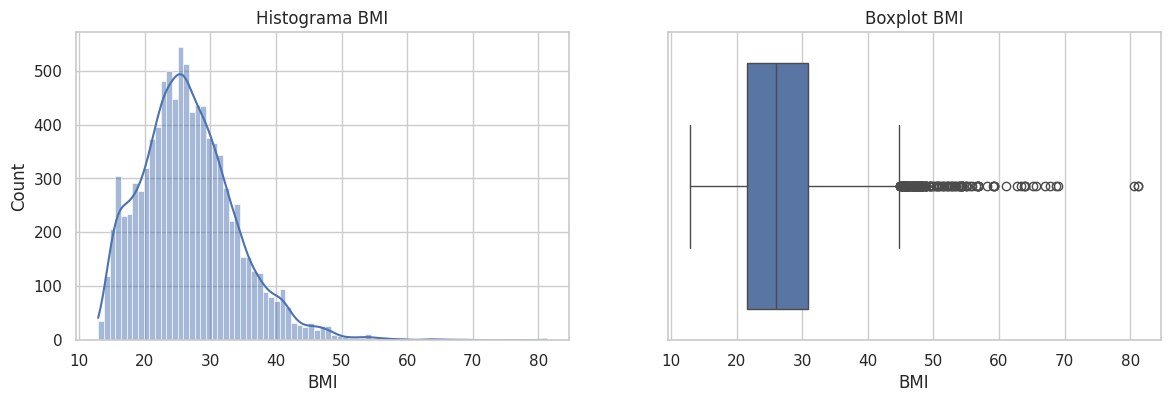

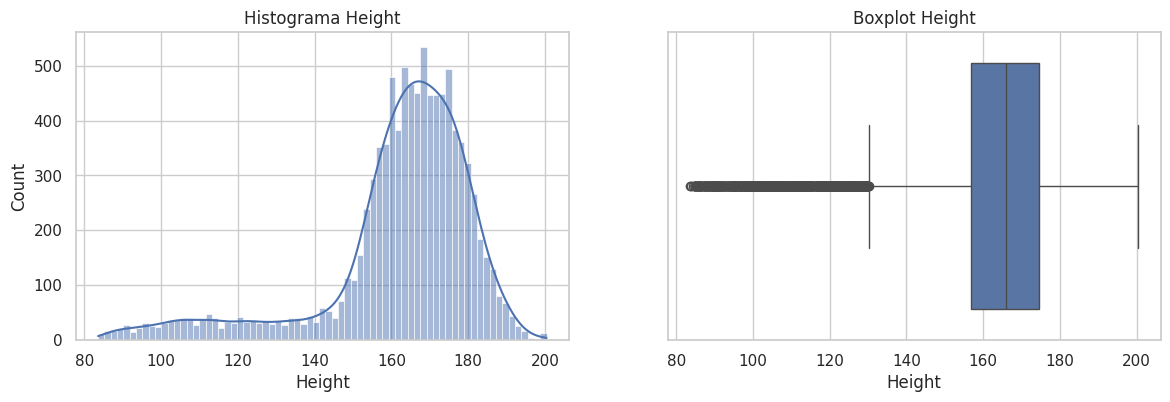

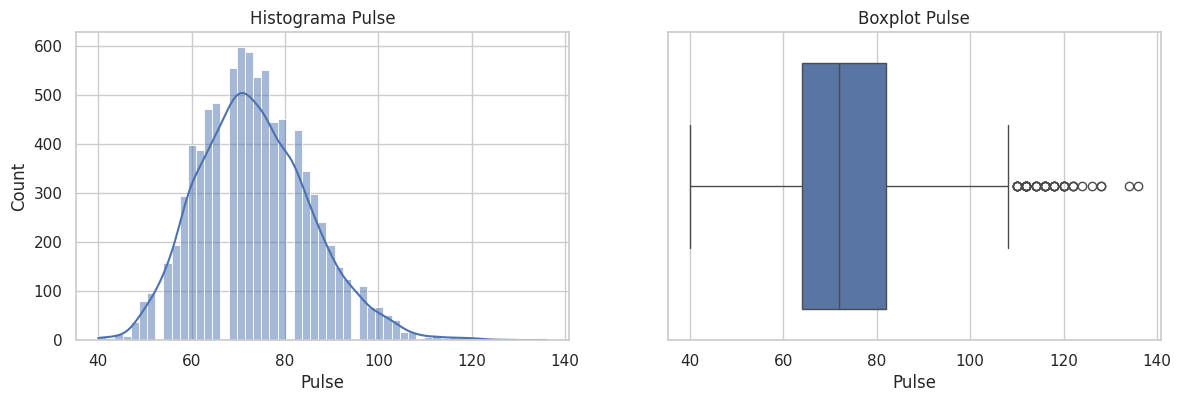

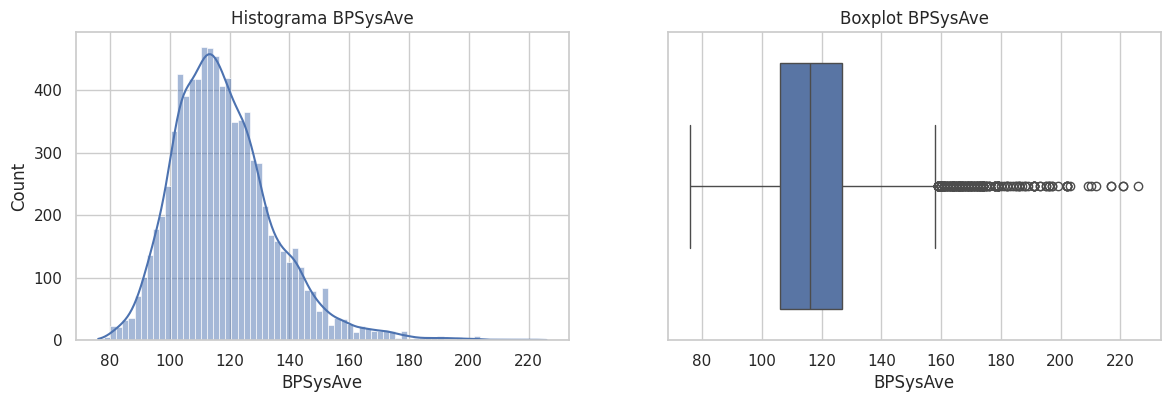

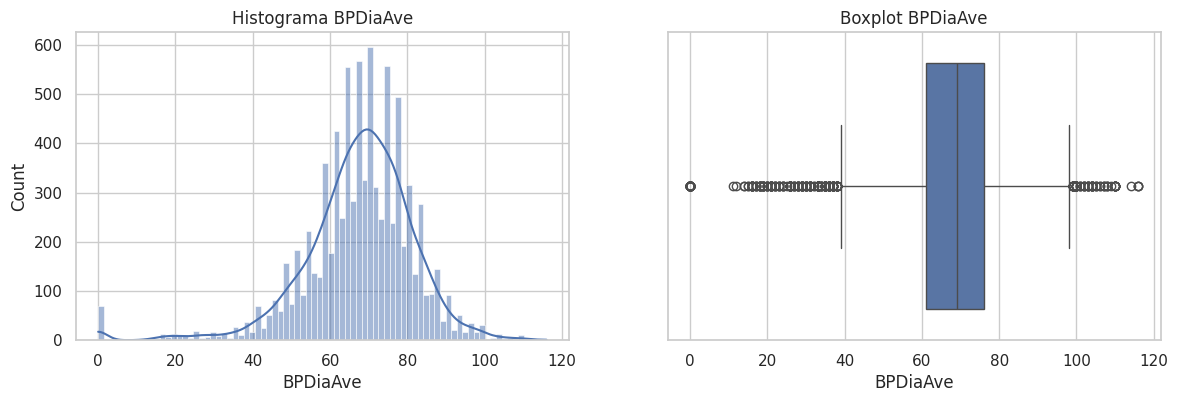

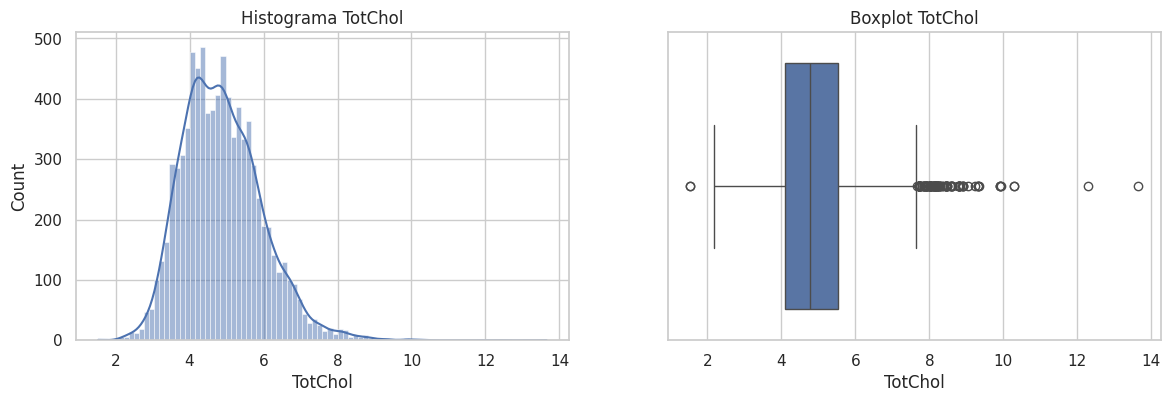

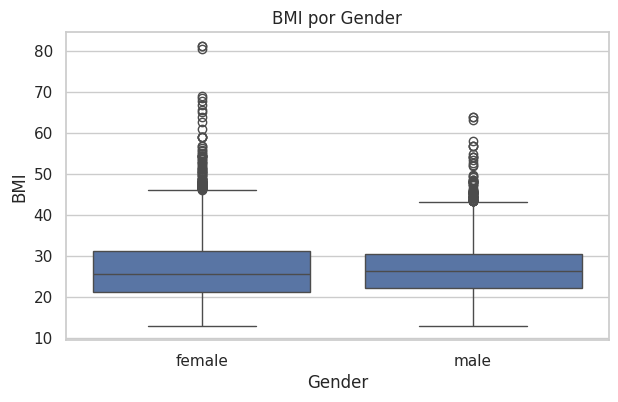

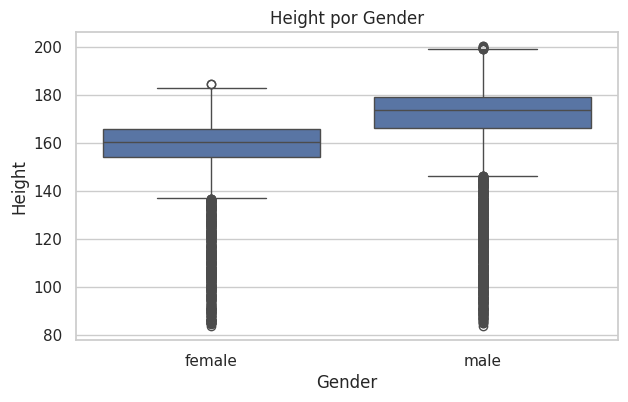

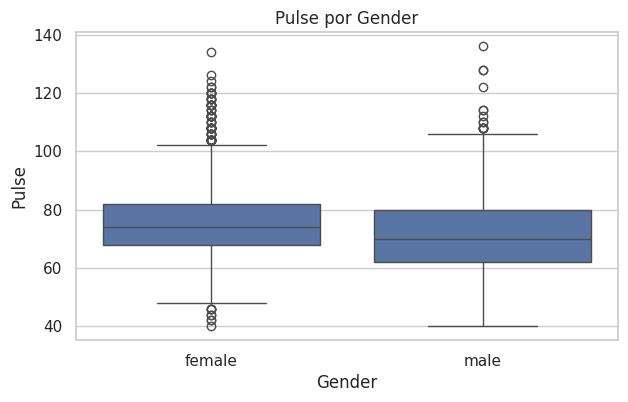

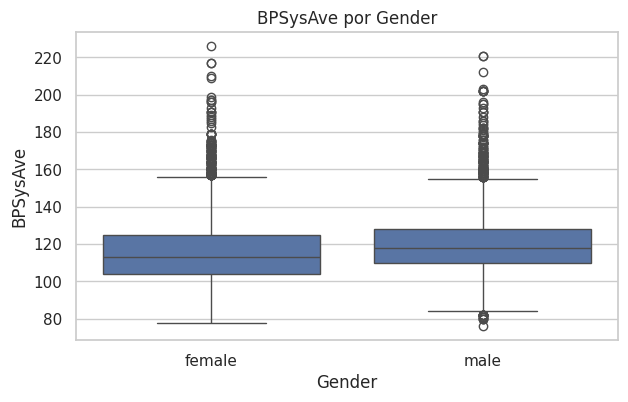

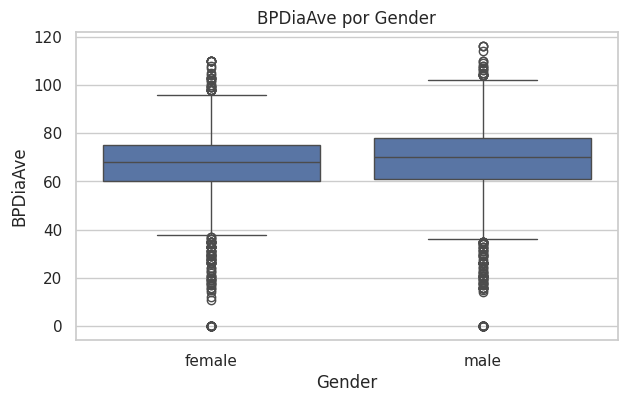

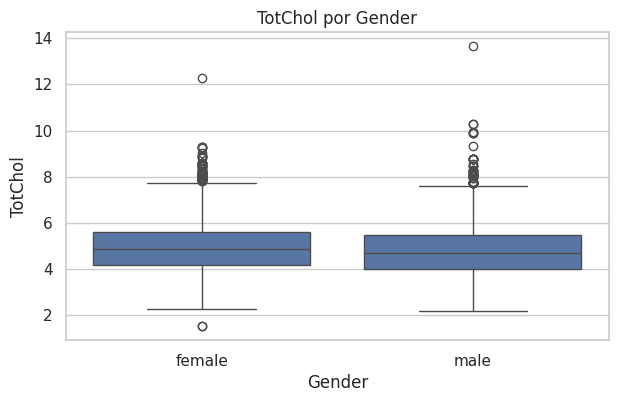

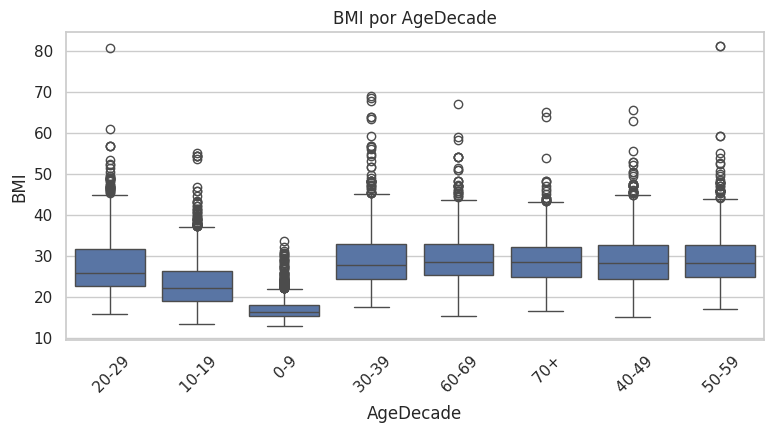

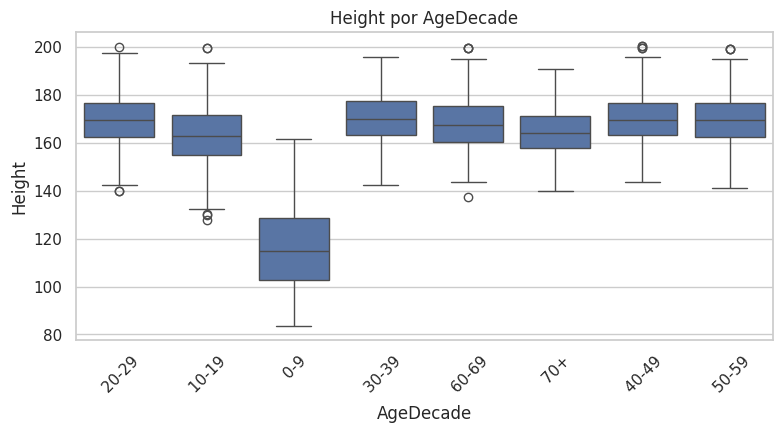

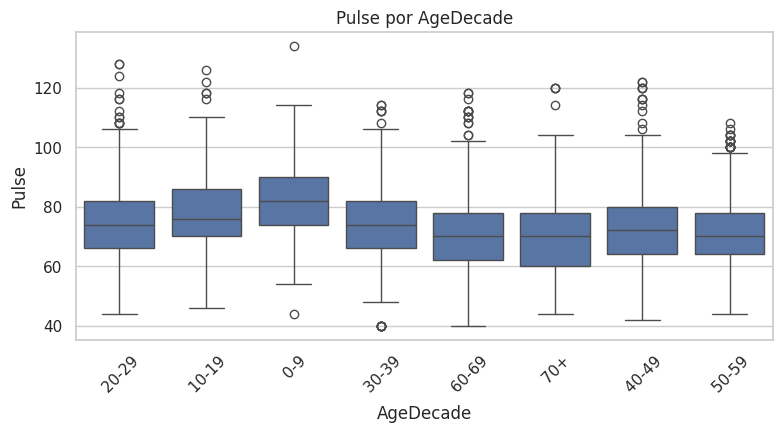

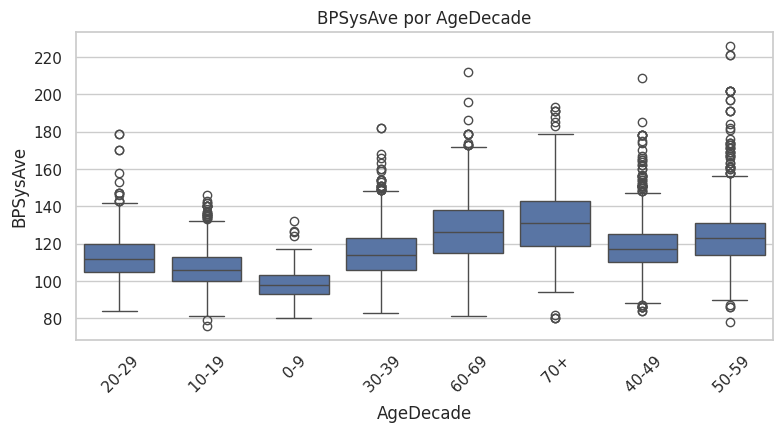

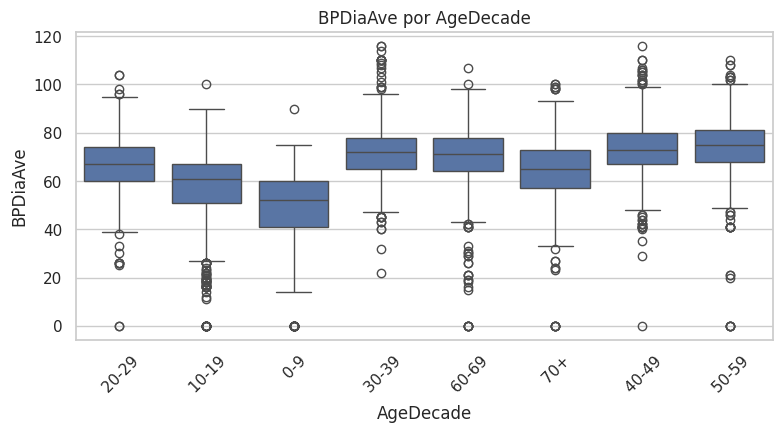

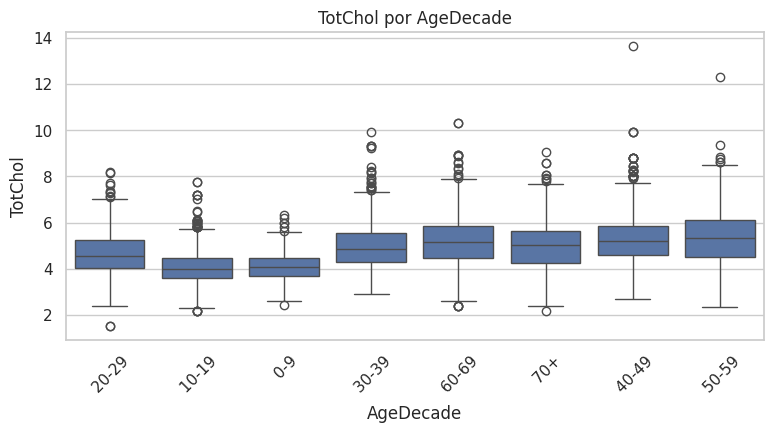

In [37]:
# Histogramas y boxplots para variables clave
for c in key_vars:
	if c not in df.columns:
		continue
	fig, axes = plt.subplots(1, 2, figsize=(14, 4))
	sns.histplot(data=df, x=c, kde=True, ax=axes[0])
	axes[0].set_title(f"Histograma {c}")
	sns.boxplot(data=df, x=c, ax=axes[1])
	axes[1].set_title(f"Boxplot {c}")
	plt.show()

# Comparación por género, si aplica
if 'Gender' in df.columns:
	for c in [v for v in key_vars if v in df.columns]:
		plt.figure(figsize=(7,4))
		sns.boxplot(data=df, x='Gender', y=c)
		plt.title(f"{c} por Gender")
		plt.show()

# Comparación por AgeDecade, si aplica
if 'AgeDecade' in df.columns:
	for c in [v for v in key_vars if v in df.columns]:
		plt.figure(figsize=(9,4))
		sns.boxplot(data=df, x='AgeDecade', y=c)
		plt.title(f"{c} por AgeDecade")
		plt.xticks(rotation=45)
		plt.show()


In [38]:
# Carga de datos (lectura directa con pandas)

df = pd.read_csv('/home/camilo-pc/gestion-datos/NHANES2009-2012.csv')
print('Forma (filas, columnas):', df.shape)
df.head(3)


FileNotFoundError: [Errno 2] No such file or directory: '/home/camilo-pc/gestion-datos/NHANES2009-2012.csv'

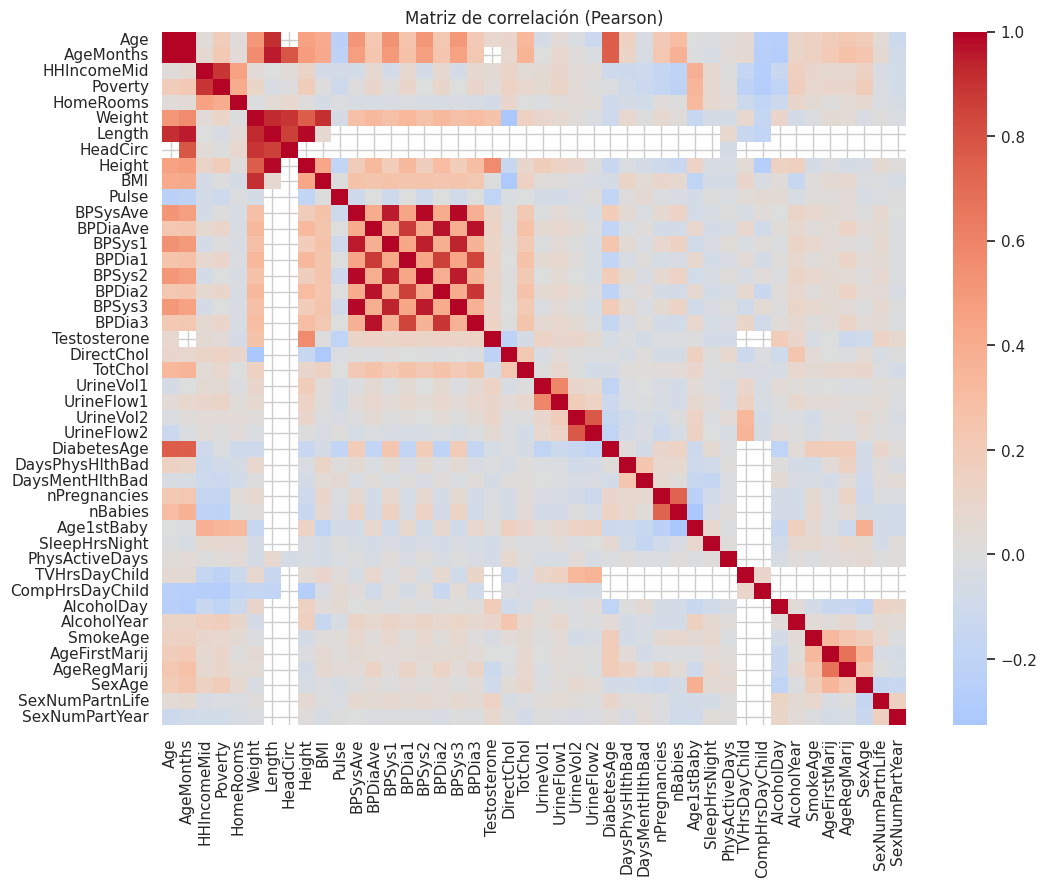

,var1,var2,abs_corr
1,Age,AgeMonths,0.999911
588,BPSys2,BPSysAve,0.988640
672,BPSys3,BPSysAve,0.988234
289,Height,Length,0.987283
715,BPDia3,BPDiaAve,0.972836
631,BPDia2,BPDiaAve,0.970695
49,AgeMonths,Length,0.953497
594,BPSys2,BPSys3,0.953128
504,BPSys1,BPSysAve,0.952475
508,BPSys1,BPSys2,0.946915


In [ ]:
num_df = df.select_dtypes(include=[np.number]).copy()
num_df = num_df.loc[:, num_df.columns.notna()]

# Remover columnas casi constantes o ID-like para correlación (heurística)
low_var_cols = [c for c in num_df.columns if num_df[c].nunique(dropna=True) <= 2]
id_like = [c for c in num_df.columns if c.lower() in {"id", "identifier"}]
keep_cols = [c for c in num_df.columns if c not in set(low_var_cols + id_like)]

corr = num_df[keep_cols].corr(method='pearson')
plt.figure(figsize=(12, 9))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Matriz de correlación (Pearson)')
plt.show()

# Top correlaciones absolutas
corr_abs = corr.abs().stack().reset_index()
corr_abs.columns = ['var1','var2','abs_corr']
# filtrar duplicados y self-corr
corr_abs = corr_abs[corr_abs['var1'] < corr_abs['var2']]
corr_abs.sort_values('abs_corr', ascending=False).head(15)
